#Prediction using Custom Made Deep Learning Models
> Crypto being traded 24/7, it was important to draw time based boundaries over the trading period. Yahoo Finance has already segmented the trading data of various crypto currencies into *Open*, *High*, *Low*, *Close*. The segmentation assists in developing robust deep learning models for predictions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import tensorflow as tf
# For time stamps
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import LeakyReLU
leaky_relu = LeakyReLU(alpha=0.1)

#Adding the Datasets 
1. AAVE
2. MATIC
3. ETHER
4. SOLANA
> The Dataset was preprocessed in such a way that the model learns current date values of *Open*, *High*, *Low* and *Close* to predict **CONCURRENT DAY'S** *Open* and *High*.

>*Loss* and *Accuracy* Graphs are given to represent the model's efficiency.

In [ ]:
aave = pd.read_csv('/content/drive/MyDrive/ETHIndia/AAVE-USD - AAVE-USD.csv')
sol = pd.read_csv('/content/drive/MyDrive/ETHIndia/SOL-USD - SOL-USD.csv')
eth = pd.read_csv('/content/drive/MyDrive/ETHIndia/ETH-USD - ETH-USD.csv')
matic = pd.read_csv('/content/drive/MyDrive/ETHIndia/MATIC-USD - MATIC-USD.csv')


In [ ]:
aave = aave.dropna()
sol = sol.dropna()
eth = eth.dropna()
matic = matic.dropna()

In [ ]:
def data_prep(df):
  '''
  Data Preperation Function
  '''
  y_val=df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
  x_data=df.drop(['Open_1', 'High_1', 'Low_1', 'Close_1', 'Volume'], axis = 1)
  return x_data, y_val

In [ ]:
def fun_predict(list_inputs, path ):
  '''
  Function is used to change the input to suit the input shape of the model.
  '''
  y_test_1 = np.array([list_inputs], dtype='float64')
  y_test_1 = tf.constant(y_test_1)
  y_test_1= tf.expand_dims(y_test_1, axis = -1)
  saved_standard_model = tf.keras.models.load_model(path)
  output = saved_standard_model.predict(y_test_1)

  print(f'Predicted Open: {output[0][0]}, Predicted High: {output[0][1]}')




#Predictive Analysis of AAVE

In [ ]:
aave.head()

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
0,244.841919,246.194611,219.909363,225.629776,241365943,226.138626,226.292923,162.339096,202.915970
1,226.138626,226.292923,162.339096,202.915970,610712251,202.629684,206.034790,187.302673,191.749329
2,202.629684,206.034790,187.302673,191.749329,270580588,191.771362,191.857620,168.934967,185.207870
3,191.771362,191.857620,168.934967,185.207870,387818841,185.281647,197.220306,181.133453,187.604935
4,185.281647,197.220306,181.133453,187.604935,282131643,187.159836,202.616745,179.955292,202.616745


In [ ]:
df_des= aave.describe()
df_des

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000
mean,123.261893,128.600836,117.489078,122.768937,2.359891e+08,122.770975,128.107383,117.061482,122.326327
std,55.534480,58.290751,52.561417,55.241004,1.706938e+08,55.248023,58.054413,52.360375,55.061499
min,49.409107,54.914684,45.979153,49.428272,4.249259e+07,49.409107,54.914684,45.979153,49.428272
25%,80.785721,83.332512,77.367149,80.373329,1.330732e+08,80.383904,83.316902,76.966553,79.618698
50%,100.203484,105.344650,95.281731,99.493721,1.882791e+08,99.484825,103.962837,94.957664,99.329384
75%,163.944214,170.848587,157.399475,163.281372,2.872777e+08,163.292694,170.182877,157.093140,163.266617
max,276.802246,296.736633,266.038788,276.744568,1.517821e+09,276.802246,296.736633,266.038788,276.744568


In [ ]:
y_val=aave.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
x_data=aave.drop(['Open_1', 'High_1', 'Low_1', 'Close_1', 'Volume'], axis = 1)

In [ ]:


model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, input_shape=[4] ,activation = leaky_relu),
                               tf.keras.layers.Dense(100 ,activation = leaky_relu),
                               tf.keras.layers.Dense(100 ,activation = leaky_relu),
                               tf.keras.layers.Dense(100 ,activation = leaky_relu),
                               tf.keras.layers.Dense(4,activation = leaky_relu),

])

model_1.compile(loss = 'MAE',
                optimizer =tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ['accuracy'])

history_1 = model_1.fit(tf.expand_dims(x_data, axis=-1), y_val, batch_size=12, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 2s 5ms/step - loss: 28.3922 - accuracy: 0.3425
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 8.8768 - accuracy: 0.5945
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 9.5933 - accuracy: 0.6630
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 8.5868 - accuracy: 0.6055
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 7.2126 - accuracy: 0.7397
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 8.8606 - accuracy: 0.7425
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 11.6988 - accuracy: 0.6712
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 7.7382 - accuracy: 0.6904
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 6.4121 - accuracy: 0.6466
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 6.8918 - accuracy: 0.7425
Epoch 11/100
31/31 

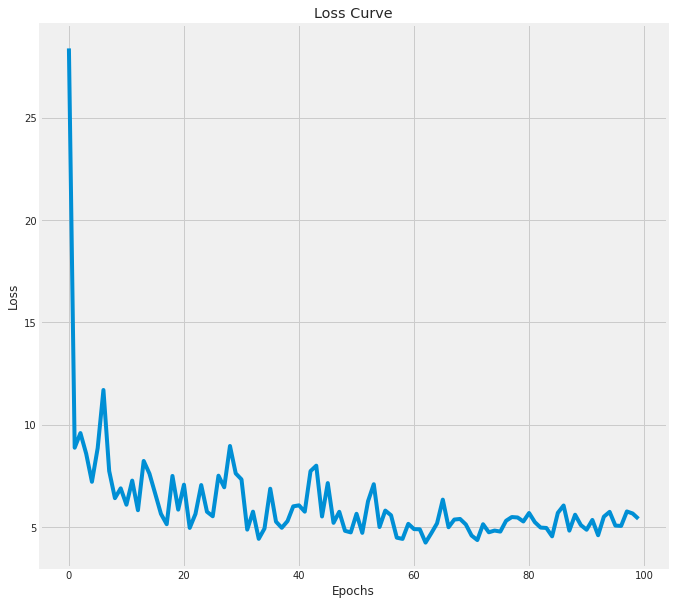

In [ ]:
df_his_1 = pd.DataFrame(history_1.history)
df_his_1['loss'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Loss', title = 'Loss Curve')

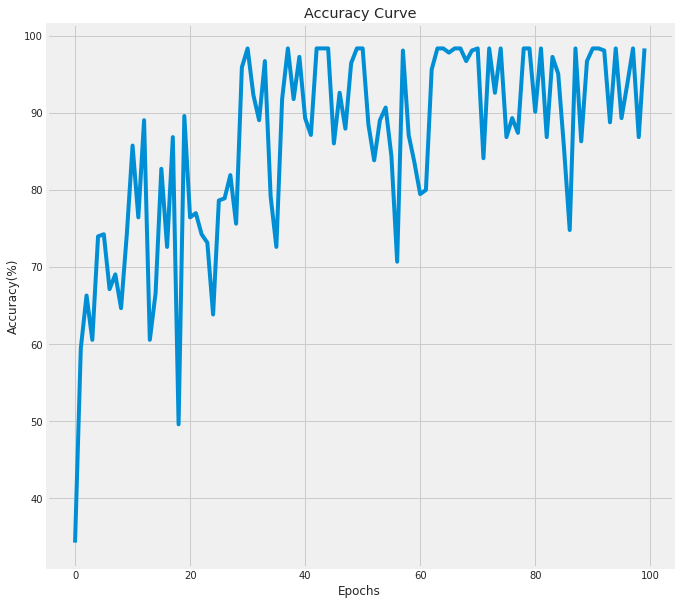

In [ ]:
df_his_1['accuracy'] = df_his_1['accuracy']*100
df_his_1['accuracy'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Accuracy(%)', title = 'Accuracy Curve')

##Testing AAVE Model

Here, the exisitng day value is taken and check the validity for the preciding day.

In [ ]:
aave.head()

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
0,244.841919,246.194611,219.909363,225.629776,241365943,226.138626,226.292923,162.339096,202.915970
1,226.138626,226.292923,162.339096,202.915970,610712251,202.629684,206.034790,187.302673,191.749329
2,202.629684,206.034790,187.302673,191.749329,270580588,191.771362,191.857620,168.934967,185.207870
3,191.771362,191.857620,168.934967,185.207870,387818841,185.281647,197.220306,181.133453,187.604935
4,185.281647,197.220306,181.133453,187.604935,282131643,187.159836,202.616745,179.955292,202.616745


In [ ]:
model_1.save('model_aave.h5') #saving model

In [ ]:
path_model_1 = f'/content/model_aave.h5'
fun_predict([aave['Open'][0], aave['High'][0], aave['Low'][0], aave['Close'][0]], path_model_1)

1/1 [==============================] - 0s 74ms/step
Predicted Open: 229.1005096435547, Predicted High: 239.2012176513672


#Predictive Analysis of SOLANA

In [ ]:
X_sol, y_sol = data_prep(sol)

In [ ]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, input_shape=[4] ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),

])

model_2.compile(loss = 'MAE',
                optimizer =tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])
history_2 = model_2.fit(tf.expand_dims(X_sol, axis=-1), y_sol, batch_size=32, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 7ms/step - loss: 69.6641 - accuracy: 0.9534
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 61.4269 - accuracy: 0.4164
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 34.7061 - accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 24.8921 - accuracy: 0.7151
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 22.3570 - accuracy: 0.5370
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 22.0841 - accuracy: 0.9671
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 21.8200 - accuracy: 0.9671
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 21.8846 - accuracy: 0.9671
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 21.7612 - accuracy: 0.9671
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 20.8543 - accuracy: 0.9671
Epoch 1

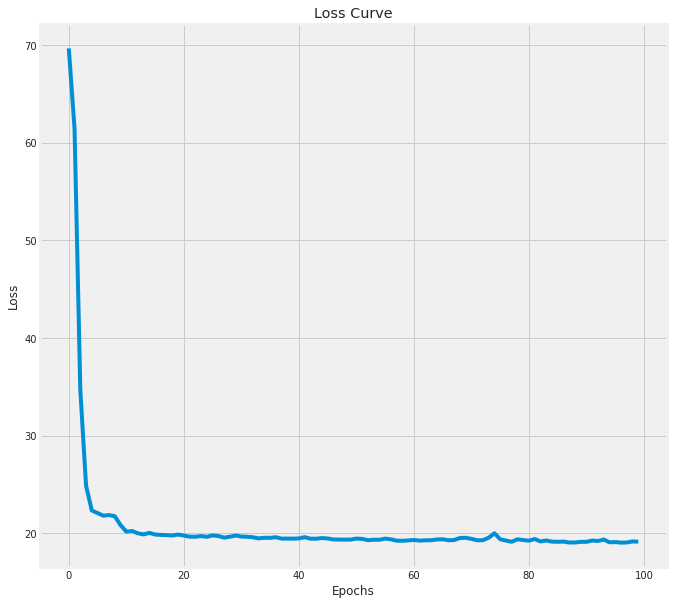

In [85]:
df_his_2 = pd.DataFrame(history_2.history)
df_his_2['loss'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Loss', title = 'Loss Curve')


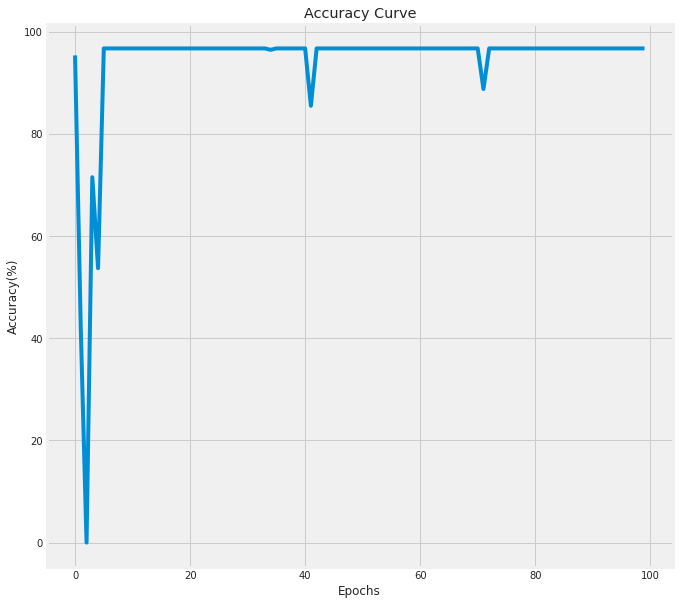

In [86]:
df_his_2['accuracy'] = df_his_2['accuracy']*100
df_his_2['accuracy'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Accuracy(%)', title = 'Accuracy Curve')

In [ ]:
model_2.save('model_sol.h5')

##Testing of SOLANA Model

In [ ]:
sol.head()

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
0,233.601898,239.122101,207.329773,211.224396,4061060881,212.112381,212.807541,171.553574,201.124832
1,212.112381,212.807541,171.553574,201.124832,5949505665,200.780609,204.617477,182.016815,196.168259
2,200.780609,204.617477,182.016815,196.168259,3402591975,196.547485,197.663025,176.888062,194.199219
3,196.547485,197.663025,176.888062,194.199219,3693853028,194.276596,204.118500,188.280807,190.596909
4,194.276596,204.118500,188.280807,190.596909,2556849839,190.505005,196.374115,184.132706,194.621704


In [ ]:
path_model_2 = f'/content/model_sol.h5'
fun_predict(list_inputs = [sol['Open'][0], sol['High'][0], sol['Low'][0], sol['Close'][0]] , path= path_model_2)

1/1 [==============================] - 0s 154ms/step
Predicted Open: 209.3531951904297, Predicted High: 214.60354614257812


#Predictive Analysis of MATIC

In [41]:
x_matic, y_matic = data_prep(matic)

In [42]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, input_shape=[4] ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),

])

model_3.compile(loss = 'MAE',
                optimizer =tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])
history_3 = model_3.fit(tf.expand_dims(x_matic, axis=-1), y_matic, batch_size=32, epochs = 100, verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9467 - accuracy: 0.9781
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.9781
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.1589
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.9781
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.9781
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.9781
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.9781
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.9781
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.9781
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.9781
Epoch 11/

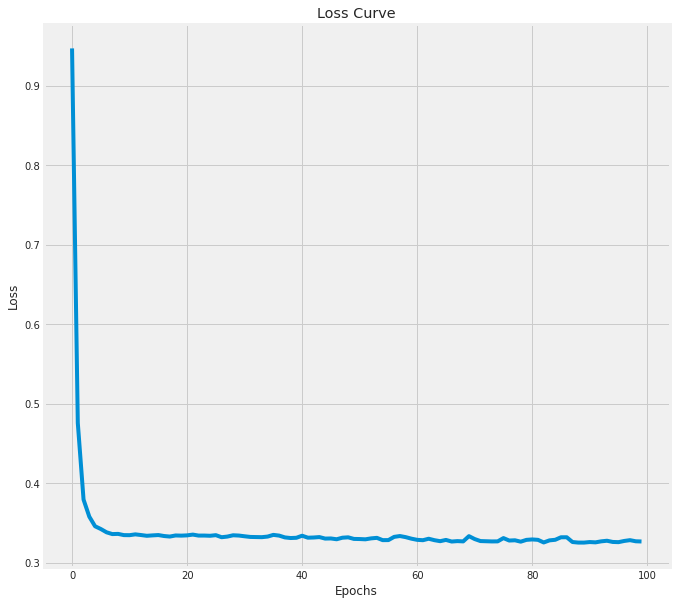

In [88]:
df_his_3 = pd.DataFrame(history_3.history)
df_his_3['loss'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Loss', title = 'Loss Curve')


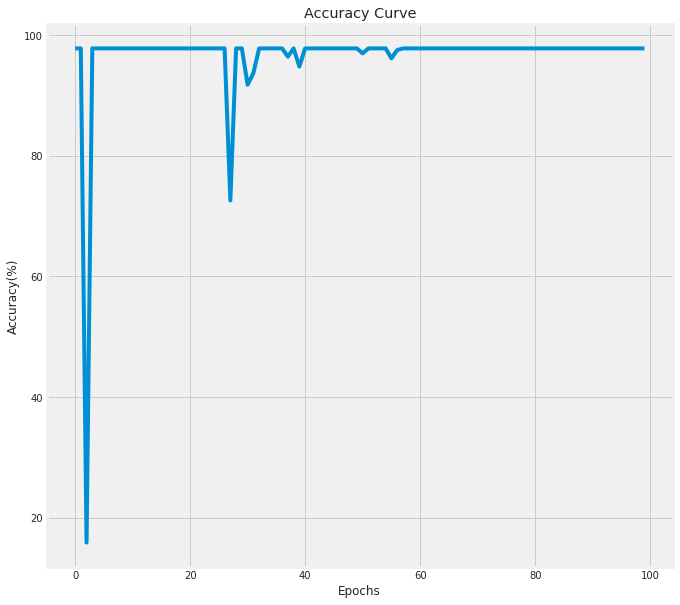

In [89]:
df_his_3['accuracy'] = df_his_3['accuracy']*100
df_his_3['accuracy'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Accuracy(%)', title = 'Accuracy Curve')

In [43]:
model_3.save('model_matic.h5')

##Testing of MATIC Model


In [48]:
matic.tail()

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
360,0.844939,0.847751,0.809179,0.822698,293294577,0.822415,0.845024,0.817048,0.838892
361,0.822415,0.845024,0.817048,0.838892,223650810,0.839003,0.936996,0.839003,0.936996
362,0.839003,0.936996,0.839003,0.936996,495703018,0.936412,0.940099,0.908273,0.908376
363,0.936412,0.940099,0.908273,0.908376,468978303,0.908393,0.946198,0.902370,0.946198
364,0.908393,0.946198,0.902370,0.946198,361496926,0.946761,0.947608,0.919134,0.919778


In [50]:
path_model_3 = f'/content/model_matic.h5'
fun_predict(list_inputs = [matic['Open'][364], matic['High'][364], matic['Low'][364], matic['Close'][364]] , path= path_model_3)

1/1 [==============================] - 0s 57ms/step
Predicted Open: 0.9285635352134705, Predicted High: 0.9496170282363892


#Predictive Analysis of ETHER

In [51]:
x_eth, y_eth = data_prep(eth)

In [79]:
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, input_shape=[4] ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(100 ,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),

])

model_6.compile(loss = 'MAE',
                optimizer =tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])
history_6= model_6.fit(tf.expand_dims(x_eth, axis=-1), y_eth, batch_size=32, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 3ms/step - loss: 1990.3416 - accuracy: 0.0356
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1161.4388 - accuracy: 0.0356
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 299.3504 - accuracy: 0.3205
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 133.2686 - accuracy: 0.5233
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 79.3897 - accuracy: 0.5342
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 76.9955 - accuracy: 0.7781
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 68.5958 - accuracy: 0.7178
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 64.5554 - accuracy: 0.9644
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 67.2693 - accuracy: 0.9644
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 77.2484 - accuracy: 0.9644
Epoch

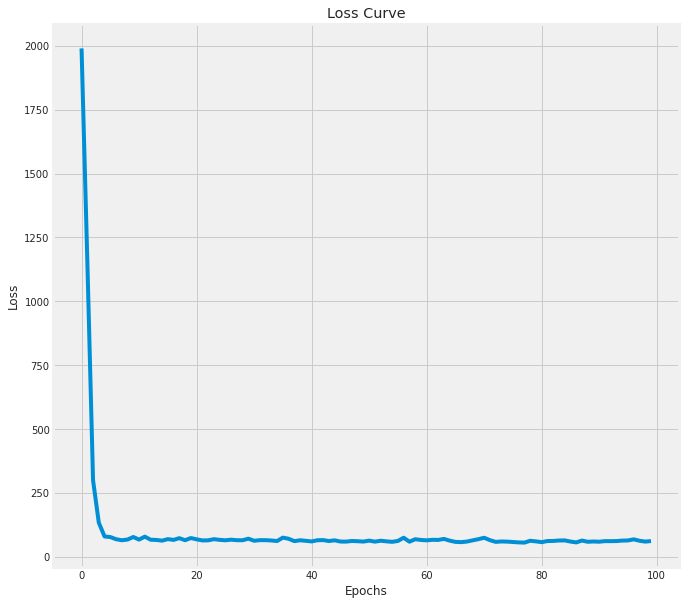

In [91]:
df_his_6 = pd.DataFrame(history_6.history)
df_his_6['loss'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Loss', title = 'Loss Curve')

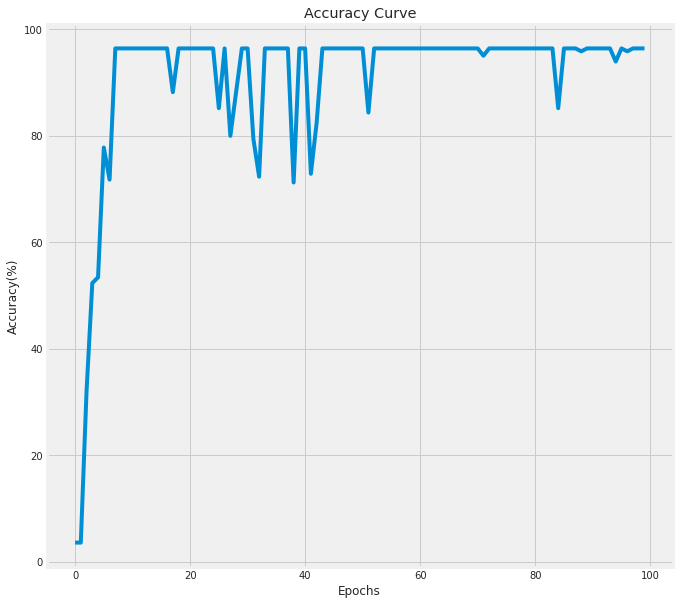

In [92]:
df_his_6['accuracy'] = df_his_6['accuracy']*100
df_his_6['accuracy'].plot(figsize= (10,10), xlabel= 'Epochs', ylabel= 'Accuracy(%)', title = 'Accuracy Curve')

In [80]:
model_6.save('model_eth.h5')

##Testing of ETHER Model

In [83]:
eth.head()

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1
0,4514.355957,4647.289063,4100.145508,4220.706055,25879591528,4227.762207,4242.725586,3525.494141,4119.587402
1,4227.762207,4242.725586,3525.494141,4119.587402,38478999182,4119.628906,4246.923340,4040.217529,4198.322754
2,4119.628906,4246.923340,4040.217529,4198.322754,25533062707,4199.000000,4375.520508,3930.806641,4358.737305
3,4199.000000,4375.520508,3930.806641,4358.737305,28229518513,4358.586914,4428.589355,4264.323730,4315.061523
4,4358.586914,4428.589355,4264.323730,4315.061523,22366213354,4311.674316,4453.112305,4234.537598,4439.357910


In [84]:
path_model_4 = f'/content/model_eth.h5'
fun_predict(list_inputs = [eth['Open'][0], eth['High'][0], eth['Low'][0], eth['Close'][0]] , path= path_model_4)

1/1 [==============================] - 0s 64ms/step
Predicted Open: 4349.599609375, Predicted High: 4437.7587890625
